# PPO Íµ¨ÌòÑ

Ïù¥Î≤à Ïû•ÏóêÏÑúÎäî PPOÎ•º ÏßÅÏ†ë Íµ¨ÌòÑÌï¥Î≥º Í≤ÉÏù¥Îã§. Ïó¨Í∏∞ÏÑú Îã§Î£®Îäî PPO Íµ¨ÌòÑÏùÄ Í≥µÎ∂Ä Î™©Ï†ÅÏúºÎ°úÎßå Îî∞ÎùºÌï¥Î≥¥Îäî Í≤ÉÏù¥ Ï¢ãÍ≥†, Ïã§Ï†ú Ïó∞Íµ¨ÎÇò ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ïûò ÏßúÏó¨ÏßÑ Ìå®ÌÇ§ÏßÄÏùò Íµ¨ÌòÑÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÌïúÎã§. ÏôúÎÉêÌïòÎ©¥ PPO ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î≥ëÎ†¨ ÌôòÍ≤Ω ÏÇ¨Ïö©ÏùÄ Í±∞Ïùò ÌïÑÏàòÏù¥Í≥†, ÎÖºÎ¨∏ÏóêÎäî ÎÇòÏôÄ ÏûàÏßÄ ÏïäÏùÄ Ïó¨Îü¨ Íµ¨ÌòÑ ÎîîÌÖåÏùºÎì§Ïù¥ Î∞òÎìúÏãú ÌïÑÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. Íµ¨ÌòÑ ÎîîÌÖåÏùºÍ≥º PPO ÏÑ±Îä• ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎäî "Implementation Matters in Deep RL: A Case Study on PPO and TRPO" ÎÖºÎ¨∏Ïóê Ïûò ÎÇòÏôÄ ÏûàÎã§.

<br>

---

## Î™®Îìà Î∂àÎü¨Ïò§Í∏∞

PPOÎäî TRPOÏùò Í∞úÏÑ†Ï≤¥Ïù¥Í∏¥ ÌïòÏßÄÎßå TRPO ÏΩîÎìúÎ•º Í≥†Ï≥êÎÇòÍ∞ÄÎäî Í≤ÉÎ≥¥Îã§Îäî ÏòàÏ†ÑÏóê Íµ¨ÌòÑÌñàÎçò GAE actor-critic ÏΩîÎìúÏóêÏÑú Ï∂îÍ∞ÄÌïòÎäî Î∞©ÏãùÏù¥ Ìõ®Ïî¨ Îçî Ìé∏ÌïòÎã§. Í∞ÄÏû• Î®ºÏ†Ä ÌïÑÏöîÌïú Î™®ÎìàÎì§ÏùÑ Î∂àÎü¨Ïò§Ïûê. Ïù¥Ï†ÑÍ≥º Îã§Î•¥Í≤å `torch.utils.data`Ïùò `TensorDataset`Í≥º `DataLoader`Í∞Ä Ï∂îÍ∞ÄÎêòÏóàÎã§. PPOÏùò Í≤ΩÏö∞ ÏàòÏßëÌïú Îç∞Ïù¥ÌÑ∞Î°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º $K$ epochÎ≤à ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≤å ÎêòÎäîÎç∞, Ïù¥Îïå Îëê ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§.

In [1]:
import random

from tqdm import tqdm
from collections import deque

import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
from torch.utils.data import TensorDataset, DataLoader

<br>

---

## PPO ÏóêÏù¥Ï†ÑÌä∏ Íµ¨ÌòÑ

`PPO` ÌÅ¥ÎûòÏä§ÏóêÏÑú Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÎì§ÏùÑ Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥Í≥† Ïù¥ÌõÑ ÏΩîÎìúÎ•º ÎÇòÏó¥ÌïòÎèÑÎ°ù Ìï† Í≤ÉÏù¥Îã§.

<br>

---

### `__init__()` Î©îÏÑúÎìú

`__init__()` Î©îÏÑúÎìúÏóê Îã§ÏñëÌïú Ïù∏ÏûêÎì§Ïù¥ Ï∂îÍ∞ÄÎêòÏóàÎã§. PPOÎäî TRPOÏ≤òÎüº 2,000Î≤à Ïù¥ÏÉÅ ÌôòÍ≤ΩÍ≥º ÏÉÅÌò∏ÏûëÏö©ÌïòÎ©∞ Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïòÍ≥† ÎÑ§Ìä∏ÏõåÌÅ¨ ÌååÎùºÎØ∏ÌÑ∞Î•º Ïó¨Îü¨ Î≤à ÏóÖÎç∞Ïù¥Ìä∏ÏãúÌÇ®Îã§. `n_steps` Ïù∏ÏûêÎäî ÌôòÍ≤ΩÍ≥º ÏÉÅÌò∏ÏûëÏö©ÌïòÎäî ÌöüÏàòÎ•º Í≤∞Ï†ïÌïòÍ≥†, `n_epochs`Îäî ÏàòÏßëÌïú Îç∞Ïù¥ÌÑ∞Î•º Î™á Î≤à Î∞òÎ≥µ ÌïôÏäµÌï†ÏßÄÎ•º Í≤∞Ï†ïÌïúÎã§. Í∞Å `epoch`ÏóêÏÑúÎäî `batch_size`Í∞úÏî© Îç∞Ïù¥ÌÑ∞Î•º ÎΩëÏïÑÏÑú ÏÜêÏã§Ìï®ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏóÖÎç∞Ïù¥Ìä∏ÏãúÌÇ®Îã§. Ïù¥Îïå ÏÜêÏã§Ìï®ÏàòÎäî Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏúÑÌïú ÏÜêÏã§Ìï®Ïàò, Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏúÑÌïú ÏÜêÏã§Ìï®Ïàò, ÏóîÌä∏Î°úÌîº Î≥¥ÎÑàÏä§Î°ú Íµ¨ÏÑ±ÎêòÎäîÎç∞, Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÜêÏã§Ìï®ÏàòÏôÄ ÏóîÌä∏Î°úÌîº Î≥¥ÎÑàÏä§Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπòÍ∞Ä Í∞ÅÍ∞Å `vf_coef`ÏôÄ `ent_coef`Ïù¥Îã§. Í∑∏Î¶¨Í≥† PPO ÏïåÍ≥†Î¶¨Ï¶òÏùò clipped surrogate objectiveÏóê ÏÇ¨Ïö©Îê† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ $\epsilon$Ïùò Ïù¥Î¶ÑÏùÑ `clip_ratio`ÏúºÎ°ú ÏÑ§Ï†ïÌïòÏòÄÎã§.

~~~python
class PPO:
    def __init__(
        self,
        state_dim,
        action_dim,
        hidden_dims=(64, 64 ),
        activation_fn=torch.tanh,
        n_steps=2048,
        n_epochs=10,
        batch_size=64,
        policy_lr=0.0003,
        value_lr=0.0003,
        gamma=0.99,
        lmda=0.95,
        clip_ratio=0.2,
        vf_coef=1.0,
        ent_coef=0.01,
    ):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.policy = MLPGaussianPolicy(state_dim, action_dim, hidden_dims, activation_fn).to(self.device)
        self.value = MLPStateValue(state_dim, hidden_dims, activation_fn).to(self.device)        
        self.n_steps = n_steps
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lmda = lmda
        self.gamma = gamma
        self.clip_ratio = clip_ratio
        self.vf_coef = vf_coef
        self.ent_coef = ent_coef

        self.policy_optimizer = torch.optim.Adam(self.policy.parameters(), lr=policy_lr)
        self.value_optimizer = torch.optim.Adam(self.value.parameters(), lr=value_lr)
        
        self.buffer = RolloutBuffer()
~~~

<br>

---

### `learn()` Î©îÏÑúÎìú

`learn()` Î©îÏÑúÎìúÏóêÏÑú GAEÏôÄ returnÏùÑ Í≥ÑÏÇ∞Ìï¥Ï£ºÎäî Í≤ÉÍπåÏßÄÎäî GAE actor-criticÍ≥º ÏôÑÏ†ÑÌûà ÎèôÏùºÌïòÎã§. Í∑∏ Ïù¥ÌõÑÎ∂ÄÌÑ∞ ÏΩîÎìúÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê. Î®ºÏ†Ä, ÏàòÏßëÌïú Îç∞Ïù¥ÌÑ∞Î•º ÎÑ§Ìä∏ÏõåÌÅ¨Î•º **Ïó¨Îü¨ Î≤à** ÏóÖÎç∞Ïù¥Ìä∏ÏãúÌÇ¨ Í≤ÉÏù¥Îã§. ÌïòÏßÄÎßå, Îã® Ìïú Î≤àÏùò ÏóÖÎç∞Ïù¥Ìä∏Îßå Ìï¥ÎèÑ ÏàòÏßëÌï¥ÎÜìÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Îçî Ïù¥ÏÉÅ ÌòÑÏû¨ Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÍ≤å ÎêúÎã§. Ï¶â, on-policy ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Íπ®Ï†∏Î≤ÑÎ¶∞Îã§. Ïù¥Î•º ÏúÑÌï¥ TRPOÏôÄ PPOÏùò surrogate objectiveÏóêÎäî importance samplingÌï≠Ïù∏ $\frac{\pi_{\theta}\left( a_t |s_t\right)}{\pi_{\theta_{\text{old}}}\left( a_t |s_t\right)}$Ïù¥ ÏûàÎã§. `n_epochs`Î≤à ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎäî ÎèôÏïà $\pi_{\theta_{\text{old}}}$Îäî Í≥†Ï†ïÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î•º Î®ºÏ†Ä Íµ¨Ìï¥Ï£ºÎäî ÏΩîÎìúÏù¥Îã§.

~~~python
def learn(self):
    ...Ï§ëÎûµ...

    # GAE Î∞è log_prob_old Í≥ÑÏÇ∞
    with torch.no_grad():
        ...Ï§ëÎûµ...

        # \pi_{old}(a|s) Î°úÍ∑∏ ÌôïÎ•† Í∞í Í≥ÑÏÇ∞ÌïòÍ∏∞
        mu, std = self.policy(s)
        m = Normal(mu, std)
        z = torch.atanh(torch.clamp(a, -1.0 + 1e-7, 1.0 - 1e-7))
        log_prob_old = m.log_prob(z).sum(dim=-1, keepdims=True)
~~~

<br>

ÏóÖÎç∞Ïù¥Ìä∏Ïóê ÌïÑÏöîÌïú ÌÉÄÍ≤üÍ∞íÎì§ÏùÄ Îã§ ÎßåÎì§Ïñ¥Ï°åÎã§. Ïù¥Ï†ú `n_epochs`Î≤à ÎèôÏïà ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌïôÏäµÏãúÌÇ§Îäî ÏΩîÎìúÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê. Îß§ epochÏóêÏÑúÎäî Ï¥ù `n_steps`/`batch_size`Î≤à ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≤å ÎêòÎäîÎç∞, Í∞Å iterationÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞Î•º `batch_size`Í∞úÏî© ÎΩëÏïÑÏÑú ÏÜêÏã§Ìï®ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïúÎã§. ÌïÑÏûêÎäî Ïù¥ Í≥ºÏ†ïÏùÑ `TensorDataset`Í≥º `DataLoader`Î°ú Íµ¨ÌòÑÌñàÎã§. Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏúÑÌïú ÏÜêÏã§Ìï®Ïàò Î∞è Ï†ïÏ±ÖÏùò $\log \pi(a \mid s)$ Í≥ÑÏÇ∞ÌïòÎäî Í≤ÉÏùÄ Ïù¥Ï†Ñ Íµ¨ÌòÑÎì§Í≥º ÎèôÏùºÌïòÎã§.

~~~python
    ...Ï§ëÎûµ
    # Training the policy and value network ``n_epochs`` time
    dts = TensorDataset(s, a, ret, adv, log_prob_old)
    loader = DataLoader(dts, batch_size=self.batch_size, shuffle=True)
    for e in range(self.n_epochs):
        value_losses, policy_losses, entropy_bonuses = [], [], []
        for batch in loader:
            s_, a_, ret_, adv_, log_prob_old_ = batch

            # Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏÜêÏã§Ìï®Ïàò Í≥ÑÏÇ∞
            value = self.value(s_)
            value_loss = F.mse_loss(value, ret_)

            # Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏÜêÏã§Ìï®Ïàò Í≥ÑÏÇ∞
            mu, std = self.policy(s_)
            m = Normal(mu, std)
            z = torch.atanh(torch.clamp(a_, -1.0 + 1e-7, 1.0 - 1e-7))
            log_prob = m.log_prob(z).sum(dim=-1, keepdims=True)
~~~

<br>

ÏïÑÎûò ÏΩîÎìúÍ∞Ä clipped surrogate objectiveÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÜêÏã§Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî ÏΩîÎìúÏù¥Îã§. ÏΩîÎìúÎì§Ïù¥ Î™®Îëê ÏßÅÍ¥ÄÏ†ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Ìï¥Í∞Ä Ïûò Îê† Í≤ÉÏù¥Îùº ÎØøÏñ¥ ÏùòÏã¨Ïπò ÏïÑÎãàÌïòÏßÄ ÏïÑÎãàÌï† Ïàò ÏóÜÎã§.

~~~python

            ratio = (log_prob - log_prob_old_).exp()
            surr1 = adv_ * ratio
            surr2 = adv_ * torch.clamp(ratio, 1.0 - self.clip_ratio, 1.0 + self.clip_ratio)

            policy_loss = -torch.min(surr1, surr2).mean()
            entropy_bonus = -m.entropy().mean()

            loss = policy_loss + self.vf_coef * value_loss + self.ent_coef * entropy_bonus
            self.value_optimizer.zero_grad()
            self.policy_optimizer.zero_grad()
            loss.backward()
            self.value_optimizer.step()
            self.policy_optimizer.step()
~~~

<br>

---

### `step()` Î©îÏÑúÎìú

Ïù¥Ï†Ñ Íµ¨ÌòÑÎì§ÏóêÏÑú `batch_size` ÎåÄÏã† `n_steps`ÏùÑ ÏÇ¨Ïö©Ìïú Í≤É Ïô∏Ïóê ÎèôÏùºÌïòÎã§.

~~~python
    def step(self, transition):
        result = None
        self.buffer.store(transition)
        if self.buffer.size >= self.n_steps:
            result = self.learn()

        return result
~~~

<br>

ÏΩîÎìúÏùò Î≥ÄÍ≤ΩÏ†êÏùÄ Ïó¨Í∏∞ÍπåÏßÄÍ∞Ä Ï†ÑÎ∂ÄÏù¥Îã§. Ïù¥ÌõÑ Î™®Îì† ÏΩîÎìúÎäî Í∑∏ ÎèôÏïà Ìï¥ÏôîÎçò Í≤ÉÍ≥º Í±∞Ïùò ÎèôÏùºÌïòÎã§. Î≥µÏÇ¨ Î∂ôÏó¨ÎÑ£Í∏∞Î•º ÏÇ¨Ïö©ÌïòÏûê.

<br>

---

### RolloutBuffer Íµ¨ÌòÑ

In [2]:
class RolloutBuffer:
    def __init__(self):
        self.buffer = list()

    def store(self, transition):
        self.buffer.append(transition)

    def sample(self):
        s, a, r, s_prime, done = map(np.array, zip(*self.buffer))
        self.buffer.clear()
        return (
            torch.FloatTensor(s),
            torch.FloatTensor(a),
            torch.FloatTensor(r).unsqueeze(1),
            torch.FloatTensor(s_prime),
            torch.FloatTensor(done).unsqueeze(1)
        )

    @property
    def size(self):
        return len(self.buffer)

<br>

---

### Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨ Î∞è ÏÉÅÌÉú Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÌòÑ


In [3]:
class MLPGaussianPolicy(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dims=(512, ), activation_fn=F.relu):
        super(MLPGaussianPolicy, self).__init__()
        self.input_layer = nn.Linear(state_dim, hidden_dims[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_dims) - 1):
            hidden_layer = nn.Linear(hidden_dims[i], hidden_dims[i + 1])
            self.hidden_layers.append(hidden_layer)
        self.mu_layer = nn.Linear(hidden_dims[-1], action_dim)
        self.log_std_layer = nn.Linear(hidden_dims[-1], action_dim)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.input_layer(x))
        for hidden_layer in self.hidden_layers:
            x = self.activation_fn(hidden_layer(x))

        mu = self.mu_layer(x)
        log_std = torch.tanh(self.log_std_layer(x))

        return mu, log_std.exp()


class MLPStateValue(nn.Module):
    def __init__(self, state_dim, hidden_dims=(512, ), activation_fn=F.relu):
        super(MLPStateValue, self).__init__()
        self.input_layer = nn.Linear(state_dim, hidden_dims[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_dims) - 1):
            hidden_layer = nn.Linear(hidden_dims[i], hidden_dims[i + 1])
            self.hidden_layers.append(hidden_layer)
        self.output_layer = nn.Linear(hidden_dims[-1], 1)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.input_layer(x))
        for hidden_layer in self.hidden_layers:
            x = self.activation_fn(hidden_layer(x))
        x = self.output_layer(x)

        return x

<br>

---

### PPO ÏóêÏù¥Ï†ÑÌä∏ Íµ¨ÌòÑ

In [4]:
class PPO:
    def __init__(
        self,
        state_dim,
        action_dim,
        hidden_dims=(64, 64 ),
        activation_fn=torch.tanh,
        n_steps=2048,
        n_epochs=10,
        batch_size=64,
        policy_lr=0.0003,
        value_lr=0.0003,
        gamma=0.99,
        lmda=0.95,
        clip_ratio=0.2,
        vf_coef=1.0,
        ent_coef=0.01,
    ):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.policy = MLPGaussianPolicy(state_dim, action_dim, hidden_dims, activation_fn).to(self.device)
        self.value = MLPStateValue(state_dim, hidden_dims, activation_fn).to(self.device)        
        self.n_steps = n_steps
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lmda = lmda
        self.gamma = gamma
        self.clip_ratio = clip_ratio
        self.vf_coef = vf_coef
        self.ent_coef = ent_coef

        self.policy_optimizer = torch.optim.Adam(self.policy.parameters(), lr=policy_lr)
        self.value_optimizer = torch.optim.Adam(self.value.parameters(), lr=value_lr)
        
        self.buffer = RolloutBuffer()

    @torch.no_grad()
    def act(self, s, training=True):
        self.policy.train(training)

        s = torch.as_tensor(s, dtype=torch.float, device=self.device)
        mu, std = self.policy(s)
        z = torch.normal(mu, std) if training else mu
        action = torch.tanh(z)

        return action.cpu().numpy()
    
    def learn(self):
        self.policy.train()
        self.value.train()
        s, a, r, s_prime, done = self.buffer.sample()
        s, a, r, s_prime, done = map(lambda x: x.to(self.device), [s, a, r, s_prime, done])
        
        # GAE Î∞è log_prob_old Í≥ÑÏÇ∞
        with torch.no_grad():
            delta = r + (1 - done) * self.gamma * self.value(s_prime) - self.value(s)  # \delta_t Îã¥ÏùÄ Î∞∞Ïó¥
            adv = torch.clone(delta)  # gaeÎ•º Îã¥ÏùÑ Î∞∞Ïó¥
            ret = torch.clone(r) # returnÏùÑ Îã¥ÏùÑ Î∞∞Ïó¥
            for t in reversed(range(len(r) - 1)):
                adv[t] += (1 - done[t]) * self.gamma * self.lmda * adv[t + 1]
                ret[t] += (1 - done[t]) * self.gamma * ret[t + 1]

            # \pi_{old}(a|s) Î°úÍ∑∏ ÌôïÎ•† Í∞í Í≥ÑÏÇ∞ÌïòÍ∏∞
            mu, std = self.policy(s)
            m = Normal(mu, std)
            z = torch.atanh(torch.clamp(a, -1.0 + 1e-7, 1.0 - 1e-7))
            log_prob_old = m.log_prob(z).sum(dim=-1, keepdims=True)
        
        # Training the policy and value network ``n_epochs`` time
        dts = TensorDataset(s, a, ret, adv, log_prob_old)
        loader = DataLoader(dts, batch_size=self.batch_size, shuffle=True)
        for e in range(self.n_epochs):
            value_losses, policy_losses, entropy_bonuses = [], [], []
            for batch in loader:
                s_, a_, ret_, adv_, log_prob_old_ = batch
                # Í∞ÄÏπò ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏÜêÏã§Ìï®Ïàò Í≥ÑÏÇ∞
                value = self.value(s_)
                value_loss = F.mse_loss(value, ret_)

                # Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏÜêÏã§Ìï®Ïàò Í≥ÑÏÇ∞
                mu, std = self.policy(s_)
                m = Normal(mu, std)
                z = torch.atanh(torch.clamp(a_, -1.0 + 1e-7, 1.0 - 1e-7))
                log_prob = m.log_prob(z).sum(dim=-1, keepdims=True)
                
                ratio = (log_prob - log_prob_old_).exp()
                surr1 = adv_ * ratio
                surr2 = adv_ * torch.clamp(ratio, 1.0 - self.clip_ratio, 1.0 + self.clip_ratio)

                policy_loss = -torch.min(surr1, surr2).mean()
                entropy_bonus = -m.entropy().mean()

                loss = policy_loss + self.vf_coef * value_loss + self.ent_coef * entropy_bonus
                self.value_optimizer.zero_grad()
                self.policy_optimizer.zero_grad()
                loss.backward()
                self.value_optimizer.step()
                self.policy_optimizer.step()

                value_losses.append(value_loss.item())
                policy_losses.append(policy_loss.item())
                entropy_bonuses.append(-entropy_bonus.item())

        result = {'policy_loss': np.mean(policy_losses),
                  'value_loss': np.mean(value_losses),
                  'entropy_bonus': np.mean(entropy_bonuses)}

        return result
    
    def step(self, transition):
        result = None
        self.buffer.store(transition)
        if self.buffer.size >= self.n_steps:
            result = self.learn()

        return result
        

<br>

___

### PPO ÏóêÏù¥Ï†ÑÌä∏ ÌõàÎ†®

PPO ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú `Pendulum-v1` ÌôòÍ≤Ω Ï†úÏñ¥Îäî Î≤†Î¶¨ Ïù¥ÏßÄÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î∞îÎ°ú Gymnasium MuJoCo ÌôòÍ≤Ω Ï§ë ÌïòÎÇòÏù∏ `Hopper-v4`Î•º Ï†úÏñ¥Ìï¥Î≥º Í≤ÉÏù¥Îã§. ÏßÄÎÇú {ref}`implementation-trpo`ÏóêÏÑú Íµ¨ÌòÑÌñàÎçò TRPOÏôÄ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥Î©¥ Ï¢ãÏùÑ Í≤ÉÏù¥Îã§.

In [5]:
def evaluate(env_name, agent, seed, eval_iterations):
    env = gym.make(env_name)
    scores = []
    for i in range(eval_iterations):
        (s, _), terminated, truncated, score = env.reset(seed=seed + 100 + i), False, False, 0
        while not (terminated or truncated):
            a = agent.act(s, training=False)
            s_prime, r, terminated, truncated, _ = env.step(a)
            score += r
            s = s_prime
        scores.append(score)
    env.close()
    return round(np.mean(scores), 4)

In [6]:
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


In [7]:
env_name = 'Hopper-v4'

seed = 0
seed_all(seed)
max_iterations = 1000000
eval_intervals = 10000
eval_iterations = 10
activation_fn = F.relu

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
agent = PPO(
    state_dim,
    action_dim,
    activation_fn=activation_fn,
)

logger = []
(s, _), terminated, truncated = env.reset(seed=seed), False, False
for t in tqdm(range(1, max_iterations + 1)):
    a = agent.act(s)
    s_prime, r, terminated, truncated, _ = env.step(a)
    result = agent.step((s, a, r, s_prime, terminated))
    s = s_prime
    
    if result is not None:
        logger.append([t, 'policy_loss', result['policy_loss']])
        logger.append([t, 'value_loss', result['value_loss']])
        logger.append([t, 'entropy_bonus', result['entropy_bonus']])
    
    if terminated or truncated:
        (s, _), terminated, truncated = env.reset(), False, False
        
    if t % eval_intervals == 0:
        score = evaluate(env_name, agent, seed, eval_iterations)
        logger.append([t, 'Avg return', score])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000000/1000000 [17:26<00:00, 955.36it/s]


<br>

ÏïÑÎûòÎäî Í≤∞Í≥º ÌïôÏäµ Í≥°ÏÑ†Ïù¥Îã§. Ï∞∏Í≥†Î°ú TRPOÏùò ÌïôÏäµ Í≥°ÏÑ†ÏùÄ {ref}`implementation-trpo-hopper`ÏóêÏÑú Ï∞æÏïÑÎ≥º Ïàò ÏûàÎã§. 

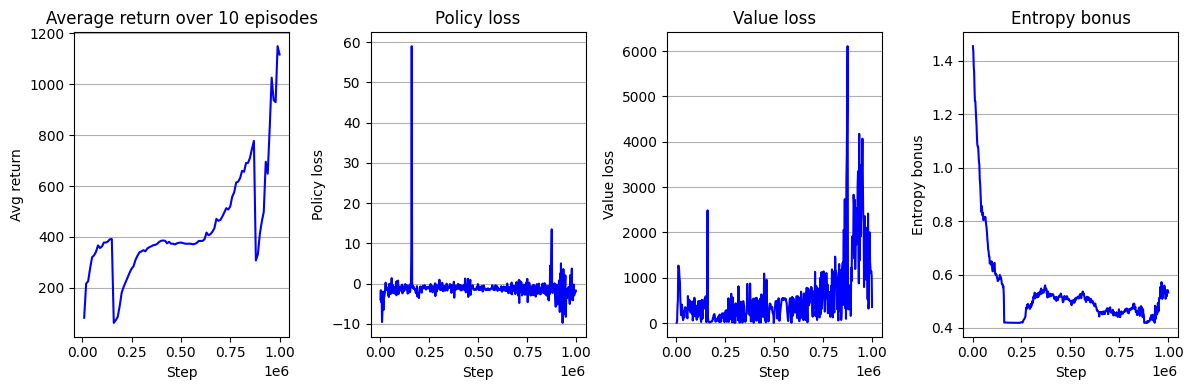

In [8]:
logger = pd.DataFrame(logger)
logger.columns = ['step', 'key', 'value']

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 4, 1)
key = 'Avg return'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Average return over 10 episodes")
ax.set_xlabel("Step")
ax.set_ylabel("Avg return")

ax = fig.add_subplot(1, 4, 2)
key = 'policy_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Policy loss")
ax.set_xlabel("Step")
ax.set_ylabel("Policy loss")

ax = fig.add_subplot(1, 4, 3)
key = 'value_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Value loss")
ax.set_xlabel("Step")
ax.set_ylabel("Value loss")

ax = fig.add_subplot(1, 4, 4)
key = 'entropy_bonus'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Entropy bonus")
ax.set_xlabel("Step")
ax.set_ylabel("Entropy bonus")

fig.tight_layout()
plt.show()

<br>

ÏïÑÎãà Ïôú TRPOÎ≥¥Îã§ ÏÑ±Îä•Ïù¥ Ïïà Ï¢ãÏïÑÏöî? ÏΩîÎìú Íµ¨ÌòÑ Ï†úÎåÄÎ°ú Ïïà ÌïúÍ±∞ ÏïÑÎãàÏóêÏöî?ÎùºÍ≥† Î¨ºÏñ¥Î≥∏Îã§Î©¥ Í∑∏Í±¥ Î∞îÎ°ú ReLUÎ•º ÏÇ¨Ïö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§! Ïù¥Í≤å Î¨¥Ïä® ÏÜåÎ¶¨Ïù∏Í∞Ä Ïã∂ÏùÑ Í≤ÉÏù¥Îã§. Ïö∞Î¶¨Ïùò ÏùºÎ∞òÏ†ÅÏù∏ ÎØøÏùåÏùÄ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî ReLUÍ∞Ä hyperbolic tangent (tanh)Î≥¥Îã§ Ï¢ãÎã§Îäî Í≤ÉÏù¥Îã§. ÌïÑÏûêÎèÑ Í∑∏Î†áÍ≤å ÏÉùÍ∞ÅÌñàÎã§. Í∑∏ÎûòÏÑú ÌïÑÏûêÍ∞Ä ÏòàÏ†ÑÏóê PPO ÎÖºÎ¨∏ÏùÑ ÏùΩÍ≥† ÏßÅÏ†ë Íµ¨ÌòÑÌï¥Î≥º Îïå ReLUÎ•º ÏÇ¨Ïö©ÌñàÏóàÎã§. Í∑∏Îü∞Îç∞ ÎÖºÎ¨∏Ïóê Î≥¥Í≥†Ìïú ÏÑ±Îä•Ïóê Ìõ®Ïî¨ Î™ª ÎØ∏ÏπòÎäî ÏÑ±Îä•Ïù¥ ÎÇòÏò§Îäî Í≤ÉÏù¥ÏóàÎã§. Ï≤òÏùåÏóî ÎÇ¥ ÏΩîÎìúÏóê Î≤ÑÍ∑∏Í∞Ä ÏûàÎäîÏ§Ñ ÏïåÏïòÏßÄ, Ïò§ÌÉÄÍ∞Ä ÏûàÎäîÏ§Ñ ÏïåÏïòÏßÄ, Íµ¨ÌòÑ ÎîîÌÖåÏùºÏùÑ ÎπºÍ≥† Íµ¨ÌòÑÌï¥ÏÑú Í∑∏Îü∞Í∞Ä Ïã∂ÏóàÏßÄ, Í∑ºÎç∞ Î©∞Ïπ† ÎèôÏïà ÎÇ¥ ÏΩîÎìúÎ•º ÏïÑÎ¨¥Î¶¨ ÎúØÏñ¥ Î≥¥Í≥† ÏÇ¥Ìé¥ Î≥¥Í≥† ÎÇ®Ïùò ÏΩîÎìú Îî∞ÎùºÏç®ÎèÑ Ï£ΩÏñ¥ÎèÑ Í≤∞Í≥ºÍ∞Ä Ïïà ÎÇòÏò§Îçò Í≤ÉÏù¥ÏóàÎã§. ÎÖºÎ¨∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏ÎåÄÎ°ú Îã§ ÏÇ¨Ïö©ÌñàÏóàÎäîÎç∞ÎèÑ ÎßêÏù¥Îã§. 

<br>

Îã® Ìïú Í∞ÄÏßÄ, ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º tanh ÎåÄÏã† ReLUÎ•º ÏÇ¨Ïö©Ìïú Í≤É Ï†úÏô∏ÌïòÍ≥†Îäî. ÏßÑÏßú ÏÑ§ÎßàÌïòÎäî ÎßàÏùåÏúºÎ°ú ReLUÎ•º ÏßÄÏö∞Í≥† tanhÎ•º ÏÇ¨Ïö©ÌïòÎãà Í∑ÄÏã† Í∞ôÏù¥ ÎÖºÎ¨∏Ïóê Î≥¥Í≥†Ìïú ÏÑ±Îä•Ïóê Í∞ÄÍπåÏõåÏßÄÎäî Í≤ÉÏùÑ Î™©Í≤©Ìï¥Î≤ÑÎ†∏Îã§. Í∑∏Î¶¨Í≥† ÎÇòÎäî Í∑∏Îïå Íπ®Îã¨ÏïòÎã§. On-policy ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌïôÏäµÏóê ÏûàÏñ¥ÏÑú ÍµâÏû•Ìûà Î∂àÏïàÏ†ïÌïòÎã§Îäî Í≤ÉÏùÑ. Í∑∏ÎûòÏÑú ÌïôÏäµ ÏïàÏ†ïÌôîÎ•º ÏúÑÌïú Ïó¨Îü¨ ÏΩîÎìú Íµ¨ÌòÑ ÎîîÌÖåÏùºÏù¥ ÌïÑÏöîÌïòÎã§Îäî Í≤ÉÏùÑ. Í∑∏ Î™®Îì† ÎîîÌÖåÏùºÏùÑ ÎÇ¥Í∞Ä Ïïå ÏàòÎäî ÏóÜÏúºÎãà ÎÇ®Ïù¥ Ïûò ÏßúÎÜìÏùÄ Í≤ÉÏùÑ Í∞ñÎã§ Ïì∞ÎäîÍ≤å Ï¢ãÎã§Îäî Í≤ÉÏùÑ. 

<br>

Ìå©Ìä∏ Ï≤¥ÌÅ¨ Îì§Ïñ¥Í∞ÄÎ≥¥Ïûê. `activation_fn`ÏùÑ `torch.tanh`ÏúºÎ°ú Î≥ÄÍ≤Ω ÌõÑ ÎèåÎ†§Î≥º Í≤ÉÏù¥Îã§.

In [9]:
env_name = 'Hopper-v4'

seed = 0
seed_all(seed)
max_iterations = 1000000
eval_intervals = 10000
eval_iterations = 10
activation_fn = torch.tanh

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
agent = PPO(
    state_dim,
    action_dim,
    activation_fn=activation_fn,
)

logger = []
(s, _), terminated, truncated = env.reset(seed=seed), False, False
for t in tqdm(range(1, max_iterations + 1)):
    a = agent.act(s)
    s_prime, r, terminated, truncated, _ = env.step(a)
    result = agent.step((s, a, r, s_prime, terminated))
    s = s_prime
    
    if result is not None:
        logger.append([t, 'policy_loss', result['policy_loss']])
        logger.append([t, 'value_loss', result['value_loss']])
        logger.append([t, 'entropy_bonus', result['entropy_bonus']])
    
    if terminated or truncated:
        (s, _), terminated, truncated = env.reset(), False, False
        
    if t % eval_intervals == 0:
        score = evaluate(env_name, agent, seed, eval_iterations)
        logger.append([t, 'Avg return', score])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000000/1000000 [18:57<00:00, 879.07it/s]


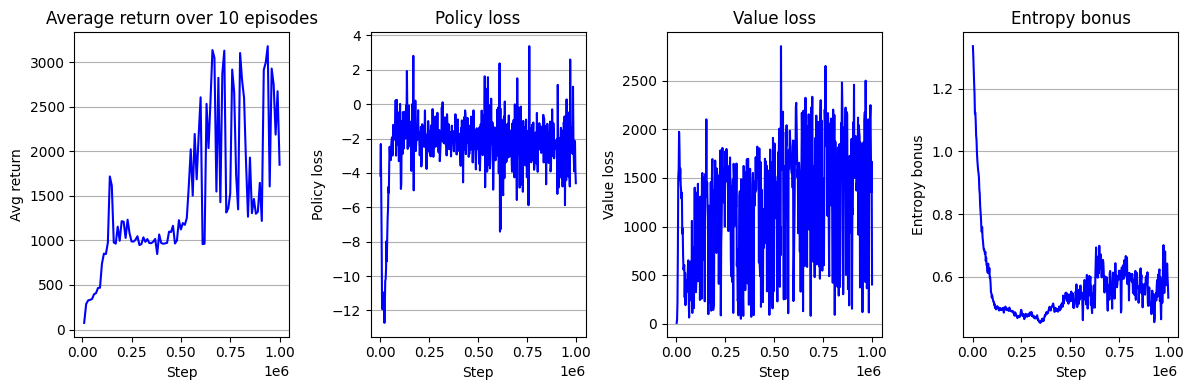

In [11]:
logger = pd.DataFrame(logger)
logger.columns = ['step', 'key', 'value']

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 4, 1)
key = 'Avg return'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Average return over 10 episodes")
ax.set_xlabel("Step")
ax.set_ylabel("Avg return")

ax = fig.add_subplot(1, 4, 2)
key = 'policy_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Policy loss")
ax.set_xlabel("Step")
ax.set_ylabel("Policy loss")

ax = fig.add_subplot(1, 4, 3)
key = 'value_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Value loss")
ax.set_xlabel("Step")
ax.set_ylabel("Value loss")

ax = fig.add_subplot(1, 4, 4)
key = 'entropy_bonus'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Entropy bonus")
ax.set_xlabel("Step")
ax.set_ylabel("Entropy bonus")

fig.tight_layout()
plt.show()

<br>

ÌïôÏäµ Í≥°ÏÑ†ÏùÄ ÏúÑÏôÄ Í∞ôÎã§. Î™®Îì† Í≤ÉÏù¥ ÎèôÏùºÌïòÍ≥† ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ReLuÏóêÏÑú tanhÎ°ú Î∞îÍøîÏ§¨ÏùÑ ÎøêÏù∏Îç∞ `Avg return`Ïùò ÎÜíÏù¥Í∞Ä ÏïΩ 1.5Î∞∞ ÎÜíÏïÑÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. ÏÇ¨Ïã§ ÏÇ¨ÏÜåÌïú ÏΩîÎìú Î≥ÄÌôîÏóê ÏùòÌï¥ÏÑú ÏÑ±Îä•Ïù¥ ÌÅ¨Í≤å Îã¨ÎùºÏßÄÎäî Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏùÄ on-policy ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏûàÏñ¥ÏÑú ÍµâÏû•Ìûà ÌùîÌïú ÏùºÏù¥Îã§. ÌïúÌé∏, Í∑∏ÎûòÎèÑ Ïó¨Ï†ÑÌûà TRPOÏôÄ ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏùò ÏÑ±Îä•Ïù¥Îã§. Ïã§Ï†ú PPO ÎÖºÎ¨∏ÏóêÏÑú Î≥¥Í≥†ÌïòÎäî ÏÑ±Îä•ÏùÑ Îã¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Îçî ÎßéÏùÄ Íµ¨ÌòÑ ÎîîÌÖåÏùºÏù¥ ÌïÑÏöîÌïòÎã§. Îã§Ïùå Ïû•ÏóêÏÑúÎäî ÏÇ¨Ïö©ÌïòÍ∏∞ Ïâ¨Ïö¥ Íµ¨ÌòÑ ÎîîÌÖåÏùº Î™á Í∞ÄÏßÄÎ•º ÏïåÏïÑÎ≥¥Î©∞ PPO ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í∞úÏÑ†Ìï¥Î≥º Í≤ÉÏù¥Îã§. 


<br>

```{raw} html
<script
   type="text/javascript"
   src="https://utteranc.es/client.js"
   async="async"
   repo="HiddenBeginner/Deep-Reinforcement-Learnings"
   issue-term="pathname"
   theme="github-light"
   label="üí¨ comment"
   crossorigin="anonymous"
/>
```